# Exploratory Data Analysis on TITANIC Dataset
<br>
<h4>Importing standard libraries</h4>


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

<h5>Setting the working directory</h5>

In [160]:
cd D:\PROJECTS\ML_Codechef\MiniTask1\Mini-Tasks-20\Shruti_Shreya

D:\PROJECTS\ML_Codechef\MiniTask1\Mini-Tasks-20\Shruti_Shreya


<h3>Importing the Dataset</h3>

In [161]:
train_file=pd.read_csv("train.csv")
test_file=pd.read_csv("test.csv")

<h2>Understanding the Dataset</h2>

In [162]:
train_file.shape

(891, 12)

In [163]:
train_file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3>Observation:</h3> 
<ol>
    <li>The Dataset has information about 891 people</li>
    <li>There are 12 different features of every person
        <ul>
            <li><b>PassengerId</b></li>
            <li><b>Survived:</b> 0 = No, 1 = Yes</li>
            <li><b>Pclass:</b> Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd</li>
            <li><b>Name</b></li>
            <li><b>Sex</b></li>
            <li><b>Age</b></li>
            <li><b>Sibsp:</b> # of siblings / spouses aboard the Titanic</li>
            <li><b>Parch:</b> # of parents / children aboard the Titanic</li>
            <li><b>Ticket:</b> Ticket number</li>
            <li><b>Fare:</b>Price paid by cistomer for the ticket</li>
            <li><b>Cabin:</b> Cabin number</li>
            <li><b>Embarked:</b> Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton</li>
        </ul>
    </li> 

In [164]:
#printing the first 10 rows of the train dataset
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<br>
<h3>Displaying number of elements in each column in the Dataset</h3>

In [165]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [166]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3>Displaying number of missing values in each column of the Dataset</h3>

In [167]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [168]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h3>Observations:</h3>
<ol>
    <li>Data is in int, float and String type</li>
    <li>There are 177+86 missing values in Age, 687+327 missing values in Cabin and 2 missing values in Embarked in both test and train files. 
</ol>
<br>
<h2>Visualising the Data</h2>
<br>


In [169]:
#defining a function to display bar graphs of the provided feature on the basis of how many people survived 
def chart(feature):
    survived=train_file[train_file['Survived']==1][feature].value_counts()
    dead=train_file[train_file['Survived']==0][feature].value_counts()
    survived.plot(kind='bar')

In [170]:
#defining a function to display stacked bar graphs to compare the number survivors and fatalities according to each feature 
def b_chart(feature):
    Surv = train_file[train_file['Survived']==1][feature].value_counts()
    Ded= train_file[train_file['Survived']==0][feature].value_counts()
    df = pd.DataFrame([Surv,Ded])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [171]:
#counting how many men and women survived/died 
train_file.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

<h4>Gender</h4>
<br>
Comparing the number of females and males who survived 

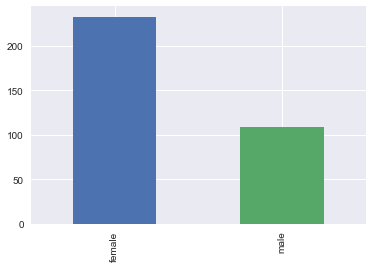

In [172]:
chart('Sex')

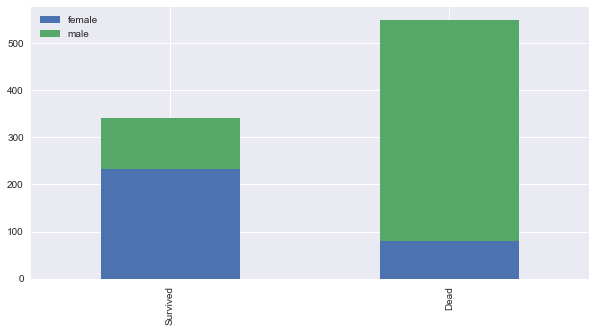

In [173]:
b_chart('Sex')

<b>Observation:</b>More women survived than men.
<br>
<br>
<h4>Passenger Class</h4>
<br>
Comparing the survivors from each passenger class, i.e. 1st, 2nd and 3rd class 

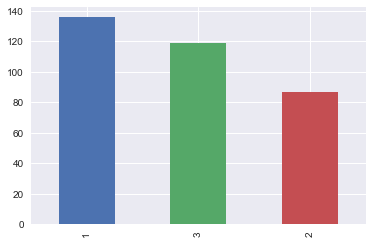

In [174]:
chart('Pclass')

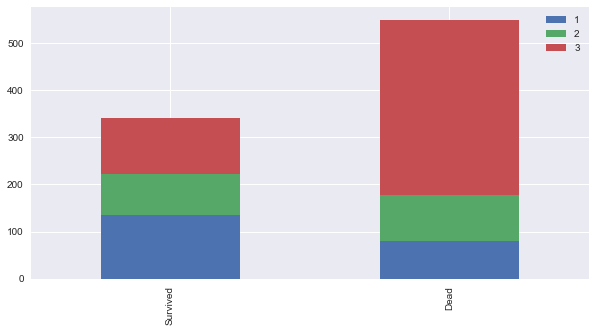

In [175]:
b_chart('Pclass')

<b>Observation: </b><br>
1st class passengers were more likely to survive than other classes<br>
3rd class passengers were more likely to die than other classes 
<br><br>


<h4>Number of Siblings+Spouse aboard the Titanic</h4> 

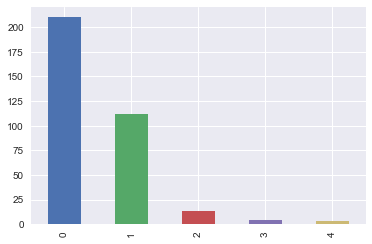

In [176]:
chart('SibSp')

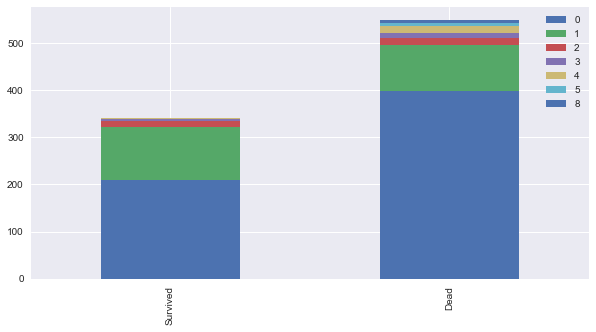

In [177]:
b_chart('SibSp')

<h4>Number of parents and children aboard the Titanic</h4>

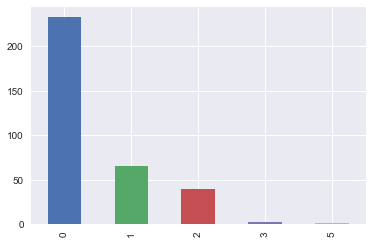

In [178]:
chart('Parch')

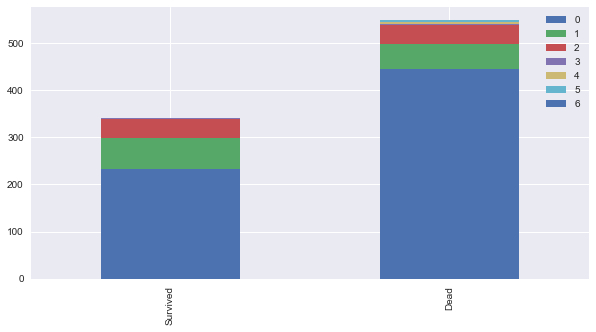

In [179]:
b_chart('Parch')

<h4>Point of embarkation of the passenger</h4> 

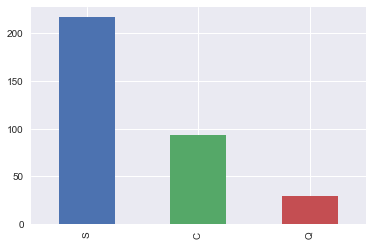

In [180]:
chart('Embarked')

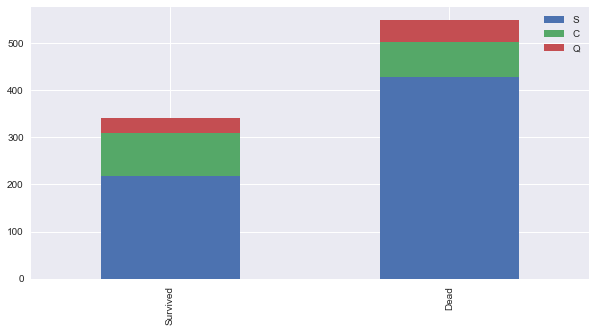

In [181]:
b_chart('Embarked')

<b>Observation:</b><br>People embarking from point S (Southanpton) were more likely to survive<br><br><br><h2>Feature Engineering</h2><h4>Sex</h4> 

In [182]:
#setting the values of the 'Sex' feature as a categorical value
train_file.Sex=train_file.Sex.astype("category")


In [183]:
train_file.Sex=train_file.Sex.cat.codes

In [184]:
test_file.Sex=test_file.Sex.astype("category")


In [185]:
test_file.Sex=test_file.Sex.cat.codes


In [186]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [187]:
test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


As we can see, <b>male</b> has been assigned a value <b>1</b> and <b>female</b> has been assigned <b>0</b><br><h4>Title</h4> 

In [188]:
train_test=[train_file,test_file]
for dataset in train_test:
    dataset['Title']=dataset['Name'].str.extract( ' ([A-Za-z]+)\.',expand=False)

In [189]:
train_file['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Jonkheer      1
Mme           1
Lady          1
Ms            1
Don           1
Sir           1
Name: Title, dtype: int64

In [190]:
test_file['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [191]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [192]:
title_map={"Mr":0, "Mrs":1,"Mme":1,"Master":2,"Miss":3,"Ms":3,"Mlle":3, "Dr":4,"Rev":4,"Major":4,"Col":4,"Don":4,"Dona":4,"Countess":4,"Jonkheer":4,"Lady":4,"Sir":4,"Capt":4}
for dataset in train_test:
    dataset['Title']=dataset['Title'].map(title_map)

In [193]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1


In [194]:
test_file.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q,3
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S,0


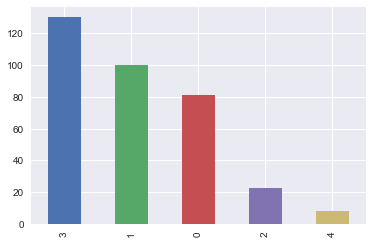

In [195]:
chart('Title')

<h4>Age</h4>

In [196]:
train_file['Age'].fillna(train_file.groupby('Title')['Age'].transform("median"), inplace=True)
test_file['Age'].fillna(test_file.groupby('Title')['Age'].transform("median"), inplace=True)


In [197]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [198]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

<h4>Fare</h4>

In [199]:
train_file['Fare'].fillna(train_file.groupby('Pclass')['Fare'].transform("median"), inplace=True)
test_file['Fare'].fillna(test_file.groupby('Pclass')['Fare'].transform("median"), inplace=True)


In [200]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

<h4>Embark</h4>

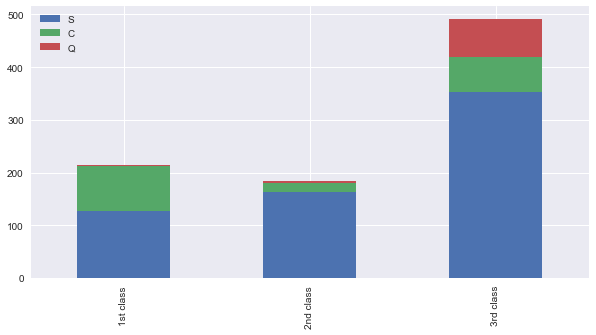

In [201]:
Pclass1 = train_file[train_file['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_file[train_file['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_file[train_file['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

<b>Observation:</b>The mojority of people from all classes embarked from point <b>S.</b><br>As there are only 2 missing values in embark in train_file, we can fill those with S.

In [202]:
#Filling missing values in Embark with 'S'
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [203]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

<b>Observation:</b>There are now no missing values in Embark.<br><br>Next, the data in Embark should be replaced with Categorical values

In [204]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1


In [205]:
train_file['Embarked']=train_file['Embarked'].astype('category')

In [206]:
train_file['Embarked']=train_file['Embarked'].cat.codes

In [207]:
test_file['Embarked']=test_file['Embarked'].astype("category")

In [208]:
test_file['Embarked']=test_file['Embarked'].cat.codes

In [209]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,NaN,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0,1


<b>Observation:</b>Embark has been assigned categorical values 0,1 and 2.<br>C got assigned 0<br>Q got assigned 1<br>S got assigned 2<br><br><h4>Combining 'SibSp' and 'Parch' into a single feature 'FamilySize' 

In [210]:
train_file['FamilySize']=train_file['SibSp']+train_file['Parch']+1
test_file['FamilySize']=test_file['SibSp']+test_file['Parch']+1

In [211]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,1
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,NaN,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,2,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0,1,2


Now, dropping the columns <b>Name, SibSp and Parch</b> as they have been incorporated into other features.<br>Also dropping features like Ticket,Cabin and PasssengerId 

In [212]:
test_file=test_file.drop(['Name','Ticket','Cabin','SibSp','Parch','PassengerId'],axis=1)

In [213]:
train_file=train_file.drop(['Name','Ticket','Cabin','SibSp','Parch','PassengerId'],axis=1)

As, the feature <b>Survived</b> is to be predicted, it should be split and stored as a seperate file

In [214]:
target=train_file['Survived']
train_file=train_file.drop('Survived',axis=1)

<h4>Converting catagorical variables to Dummy variables</h4><br>
The dataset has a lot of categorical features which need to be converted to Dummy Variables

In [218]:
#Creating dummy variables for Categorical Variables
pclass=pd.get_dummies(train_file['Pclass'],drop_first=True)
embark=pd.get_dummies(train_file['Embarked'],drop_first=True)
sex=pd.get_dummies(train_file['Sex'],drop_first=True)
title=pd.get_dummies(train_file['Title'],drop_first=True)


In [219]:
#concatinating the dummy variables into the dataset
train_file=pd.concat([train_file,pclass,embark,sex,title],axis=1)
train_file.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,2,3,1,2,1,1,2,3,4
0,3,1,22.0,7.2500,2,0,2,0,1,0,1,1,0,0,0,0
1,1,0,38.0,71.2833,0,1,2,0,0,0,0,0,1,0,0,0
2,3,0,26.0,7.9250,2,3,1,0,1,0,1,0,0,0,1,0
3,1,0,35.0,53.1000,2,1,2,0,0,0,1,0,1,0,0,0
4,3,1,35.0,8.0500,2,0,1,0,1,0,1,1,0,0,0,0
5,3,1,30.0,8.4583,1,0,1,0,1,1,0,1,0,0,0,0
6,1,1,54.0,51.8625,2,0,1,0,0,0,1,1,0,0,0,0
7,3,1,2.0,21.0750,2,2,5,0,1,0,1,1,0,1,0,0
8,3,0,27.0,11.1333,2,1,3,0,1,0,1,0,1,0,0,0
9,2,0,14.0,30.0708,0,1,2,1,0,0,0,0,1,0,0,0


In [222]:
#dropping categorical values
train=train_file.drop(['Pclass','Sex','Embarked','Title'],axis=1)
train.head(10)

,Age,Fare,FamilySize,2,3,1,2,1,1,2,3,4
0,22.0,7.2500,2,0,1,0,1,1,0,0,0,0
1,38.0,71.2833,2,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,1,0,1,0,1,0,0,0,1,0
3,35.0,53.1000,2,0,0,0,1,0,1,0,0,0
4,35.0,8.0500,1,0,1,0,1,1,0,0,0,0
5,30.0,8.4583,1,0,1,1,0,1,0,0,0,0
6,54.0,51.8625,1,0,0,0,1,1,0,0,0,0
7,2.0,21.0750,5,0,1,0,1,1,0,1,0,0
8,27.0,11.1333,3,0,1,0,1,0,1,0,0,0
9,14.0,30.0708,2,1,0,0,0,0,1,0,0,0


<h4>Splitting the dataset into test and train</h4>

In [223]:
#splitting the dataset into Training set and Test set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,target,test_size=0.25,random_state=0)
print('shape of X_train',X_train.shape,'\n','shape of X_test',X_test.shape)

shape of X_train (668, 12) 
 shape of X_test (223, 12)


The training set has been split into 668 data points for the training set and 223 data points for the test set

In [224]:
X_train.head()

,Age,Fare,FamilySize,2,3,1,2,1,1,2,3,4
105,28.0,7.8958,1,0,1,0,1,1,0,0,0,0
68,17.0,7.9250,7,0,1,0,1,0,0,0,1,0
253,30.0,16.1000,2,0,1,0,1,1,0,0,0,0
320,22.0,7.2500,1,0,1,0,1,1,0,0,0,0
706,45.0,13.5000,1,1,0,0,1,0,1,0,0,0


<b>These are the final features after EDA</b>

<h1>Preparing ML Models</h1><br><br><h2>Logistic Regression</h2>

In [242]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=50)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [244]:
#Predicting the test results
y_pred_LR=classifier.predict(X_test)
y_pred_LR

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

The array here shows the predictions made by the ML model using logistic regression<br><b>1 :</b> The person survied<br><b>0 :</b> The person did not survive

In [251]:
#checking accuracy of the Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm_LR=confusion_matrix(y_test,y_pred_LR)
acc_LR=accuracy_score(y_test,y_pred_LR)

In [252]:
print('Confusion matrix : ',cm_LR)
print('Accuracy Score : ',acc_LR)

Confusion matrix :  [[121  18]
 [ 21  63]]
Accuracy Score :  0.8251121076233184


As we can see from the confusion matrix,out of 223 predictions made, a total of 184 predictions(121+63) were correct while 39 predictions(18+21) were incorrect. The accuracy score for the Logistic regression model is 82.51% 

<h2>K-NN</h2>

In [259]:
#fitting the model to the Dataset
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors =13)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [262]:
#Predicting the test results
y_pred_KNN=clf.predict(X_test)
y_pred_KNN

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [263]:
#checking accuracy of the Model
cm_KNN=confusion_matrix(y_test,y_pred_KNN)
acc_KNN=accuracy_score(y_test,y_pred_KNN)
print('Confusion matrix : ',cm_KNN)
print('Accuracy Score : ',acc_KNN)

Confusion matrix :  [[123  16]
 [ 37  47]]
Accuracy Score :  0.7623318385650224


The model made 123+47 correct predictions and 16+37 incorrect predictions. Its accuracy was found to be 76.23%

<h2>SVM</h2>

In [265]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0)
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [267]:
y_pred_SVM=clf.predict(X_test)
y_pred_SVM

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [268]:
cm_SVM=confusion_matrix(y_test,y_pred_SVM)
acc_SVM=accuracy_score(y_test,y_pred_SVM)
print('Confusion matrix : ',cm_SVM)
print('Accuracy Score : ',acc_SVM)

Confusion matrix :  [[120  19]
 [ 21  63]]
Accuracy Score :  0.820627802690583


<h2>Gaussian Naive Bayes</h2>

In [270]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None)

In [271]:
y_pred_GNB=clf.predict(X_test)
y_pred_GNB

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1], dtype=int64)

In [272]:
cm_GNB=confusion_matrix(y_test,y_pred_GNB)
acc_GNB=accuracy_score(y_test,y_pred_GNB)
print('Confusion matrix : ',cm_GNB)
print('Accuracy Score : ',acc_GNB)

Confusion matrix :  [[109  30]
 [ 19  65]]
Accuracy Score :  0.7802690582959642


<h2>Decision Tree</h2>

In [279]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [280]:
y_pred_DT=clf.predict(X_test)
y_pred_DT

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [281]:
cm_DT=confusion_matrix(y_test,y_pred_DT)
acc_DT=accuracy_score(y_test,y_pred_DT)
print('Confusion matrix : ',cm_DT)
print('Accuracy Score : ',acc_DT)

Confusion matrix :  [[120  19]
 [ 33  51]]
Accuracy Score :  0.7668161434977578


<h2>Random Forest</h2>

In [283]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,criterion='entropy')
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [284]:
y_pred_RF=clf.predict(X_test)
y_pred_RF

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [285]:
cm_RF=confusion_matrix(y_test,y_pred_RF)
acc_RF=accuracy_score(y_test,y_pred_RF)
print('Confusion matrix : ',cm_RF)
print('Accuracy Score : ',acc_RF)

Confusion matrix :  [[121  18]
 [ 24  60]]
Accuracy Score :  0.8116591928251121


<h3>The highest accuracy providing algoritms were Logistic Regression, SVM and Random Forest.</h3>